0.797849628513 0.797849628513 0.18283595381


<IPython.core.display.Javascript object>


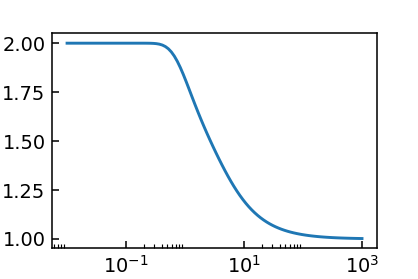

4.02811548081
0.00465632945678
0.585131616564


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib as mpl
mpl.rc(('xtick','ytick'), color='black',direction='in')
# or set for every fig: 
# ax.tick_params(direction='in',which='both')

# Function loading CEF chi from Spectre
import string
rule = string.maketrans('D', 'E') # make a translation table (rules) for translating a string (D to E in the numbers)  
def load_CEF_xt(fname):    
    temp = np.genfromtxt(fname, usecols=(0,1,2,3), \
                         converters = {1: lambda val: float(val.translate(rule)),
                                       2: lambda val: float(val.translate(rule)),
                                       3: lambda val: float(val.translate(rule))}) 
    return temp[:,[0,3]]

# Function to plot inset
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
#     x_labelsize = subax.get_xticklabels()[0].get_size()
#     y_labelsize = subax.get_yticklabels()[0].get_size()
#     x_labelsize *= rect[2]**0.5
#     y_labelsize *= rect[3]**0.5
#     subax.xaxis.set_tick_params(labelsize=x_labelsize)
#     subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

########################
# Theory for chi according to L. Bovo JPCM 2013

# constants
NA = 6.022e23
kb = 1.3807e-23 # in J/K
m  = 2.526 # in ub/Nd ion
u0 = 4e-7*np.pi # muon_0 in T m A^-1
ub = 9.274e-24 # A m^2

# C
C =  NA * u0 * (m*ub)**2 / (3*kb) # unit depends on the the number of mag ions, if per m^3, in K, if per mol, in m3/mol*K
#C1 = NA * u0 * (m * np.sin(70./180*np.pi) * ub)**2 / (3*kb) / (4e-6*np.pi)# with reduced moment due to psuedospin rotation, onverted to emu/mol*K
C1 = NA * u0 * (2.526* ub)**2 / (3*kb) / (4e-6*np.pi)# with reduced moment due to psuedospin rotation, onverted to emu/mol*K
C2 = C  / (4e-6*np.pi) # convert C to emu/mol*K

jx, jz, nu = 0.084, -0.043, 50./180*3.1415
jeff = (jx*np.sin(nu)**2 + jz*np.cos(nu)**2)/2*11.6
print C1, C2, jeff

def chi_theory(T,J,C): # J is the effective exchange constant in K
    return 2*C/T * (1+np.exp(2*J/T)) / (2+np.exp(2*J/T)+np.exp(-6*J/T))

def chiTC(T,J):
    return 2*(1+np.exp(2*J/T)) / (2+np.exp(2*J/T)+np.exp(-6*J/T))

plt.figure(figsize=[3,2])
Ts = np.logspace(-2,3,num=100)
plt.semilogx(Ts,chiTC(Ts,1.1))
plt.show()

# test on Dy2Ti2O7: calculate C and chi_0 
a = 10.12e-10 # lattice parameter in m
print u0 * (10*ub)**2 / (3*kb) * 16 * 1/a**3 # C for Dy, per m^3, in K, agreeing with L.Bovo 's

aa = 10.12e-8 # lattice parameter in cm
density = 532 / (NA * aa**3/8) * 1e3 # density in kg/m^3
#print density
print 1.5e-3 * 1e3 * 532 / (4*np.pi) / density /2 # convert chi0(Dy) in IS to emu/mol

# second method: wrong
print 1.5e-3 * 1e4 * 1e3 *  NA/(16 * 1/a**3) # convert chi_Van-Vleck(Dy) in IS (Bovo-JPCM) to erg/Oe^2/mol (emu/mol) (Bramwell JPCM 2000)


<IPython.core.display.Javascript object>


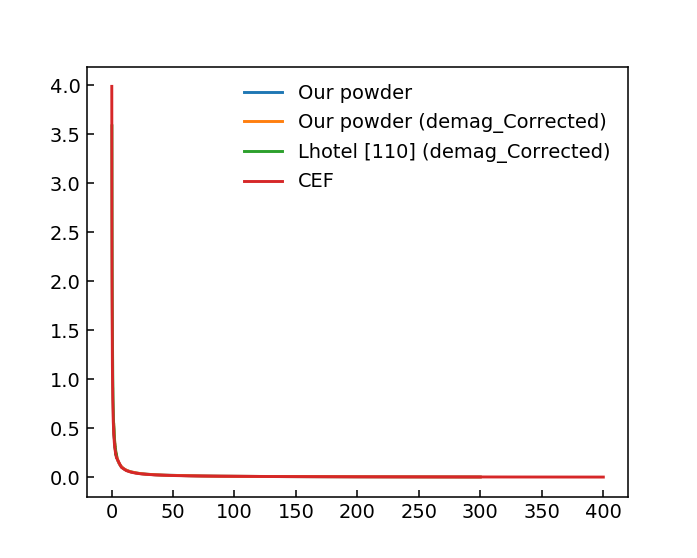

In [216]:
# Ｌｏａｄ　ｄａｔａ
fpath = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo-mt-powder-07012014.txt' # Powder Nd2Zr2O7 above 2K
fpath0 = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo-mt-powder-07012014_demagCorr.txt' # demagnetic corrected
fpath1 = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo-mt-cryst_Lhotel_PRL.txt' # Crystal [110] from by Lhotel (demagCorr) 0.3-4K

fpath2 = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo_cef_by_spectre.txt' # CEF chi
fpath3 = r'D:\9_Program files\crystal_field\nd_cef_Spectre_more_pts_below10k.txt' # CEF chi, more points

fpath4 = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo_chiT_2-50k_newSQUID_110915.txt' # Powder NZO new squid

# the published ons
fpath5 = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo-mt-powder-11092015-averaged-published.txt'
fpath6 = r'D:\3_Physical Properties\Nd2Zr2O7\Crystal\nzo_cef_by_spectre_published.txt'

dat = np.genfromtxt(fpath,skip_header=1)
dat0 = np.genfromtxt(fpath0,skip_header=1); #dat0[:,1]=1/dat0[:,1]
dat1 = np.genfromtxt(fpath1,skip_header=1)
datCEF = np.genfromtxt(fpath6,skip_header=1); datCEF[:,1]=1/datCEF[:,1]
#datCEF = load_CEF_xt(fpath3);

plt.figure(figsize=[5,4])
plt.plot(dat[:,0],dat[:,1],label='Our powder')
plt.plot(dat0[:,0],dat0[:,1],label='Our powder (demag_Corrected)')
plt.plot(dat1[:,0],dat1[:,1]/11,label='Lhotel [110] (demag_Corrected)')
plt.plot(datCEF[:,0],datCEF[:,1],label='CEF')
plt.legend(frameon=False)
plt.show()

dat2 = np.vstack([np.vstack([dat1[:,0],dat1[:,1]/11]).T, dat0]) # Combine our data above 2K and Lhotel's below 4K; Scaled;
# isotropic chi is expected due to the cubic structure
#print dat2

<IPython.core.display.Javascript object>


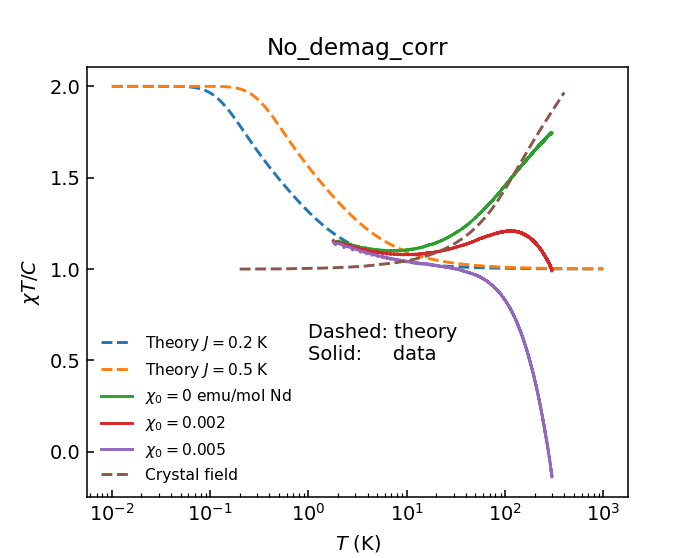

In [217]:
# ＮＺＯ　ｐｏｗｄｅｒ　ｉｎ　0.1T　ｆｉｅｌｄ，　ｎｏ　ｄｅｍａｇｎｅｔｉｃ　ｃｏｒｒｅｃｔｉｏｎ　
plt.figure(figsize=[5,4])

J = 0.2 # in K 
plt.semilogx(Ts,chiTC(Ts,J),'--', label = 'Theory $J={}$ K'.format(J))
J = 0.5 # in K 
plt.semilogx(Ts,chiTC(Ts,J),'--', label = 'Theory $J={}$ K'.format(J))

chi0= 0
plt.semilogx(dat[:,0],(dat[:,1]-chi0)*dat[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0)+' emu/mol Nd')
#plt.semilogx(dat0[:,0],(dat0[:,1]-chi0)*dat0[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0)+' emu/mol Nd')

chi0= 2e-3
plt.semilogx(dat[:,0],(dat[:,1]-chi0)*dat[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0))
chi0= 5e-3
plt.semilogx(dat[:,0],(dat[:,1]-chi0)*dat[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0))

plt.semilogx(datCEF[:,0],datCEF[:,1]*datCEF[:,0]/C2,'--',label='Crystal field')

ax = plt.gca()
plt.title('No_demag_corr')
plt.text(1,0.5,'Dashed: theory\nSolid:     data', transform=ax.transData)
plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$\chi T / C$')

plt.legend(loc='best',frameon=False,fontsize=8)#[0.45,0.58]
#plt.savefig(r'D:\7_Writing\2_Rreport\nzo_chiTC_orderM\nzo_chiC_noDemag.png',bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


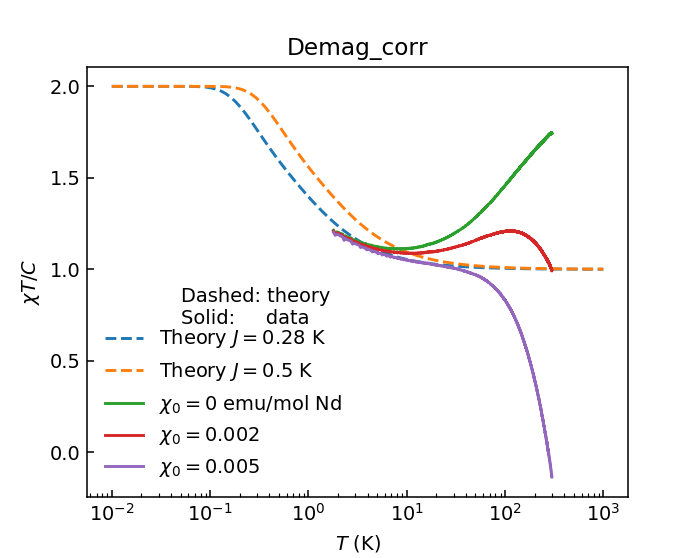

In [264]:
# with demagnetizing effect correction
plt.figure(figsize=[5,4])

J = 0.28 # in K 
plt.semilogx(Ts,chiTC(Ts,J),'--', label = 'Theory $J={}$ K'.format(J))
J = 0.5 # in K 
plt.semilogx(Ts,chiTC(Ts,J),'--', label = 'Theory $J={}$ K'.format(J))

chi0= 0
plt.semilogx(dat0[:,0],(dat0[:,1]-chi0)*dat0[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0)+' emu/mol Nd')

chi0= 2e-3
plt.semilogx(dat0[:,0],(dat0[:,1]-chi0)*dat0[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0))
chi0= 5e-3
plt.semilogx(dat0[:,0],(dat0[:,1]-chi0)*dat0[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0))

ax = plt.gca()
plt.title('Demag_corr')
plt.text(0.05,0.7,'Dashed: theory\nSolid:     data', transform=ax.transData)
plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$\chi T / C$')

plt.legend(loc='best',frameon=False)
#plt.savefig(r'D:\7_Writing\2_Rreport\nzo_chiTC_orderM\nzo_chiC_Demag.png',bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


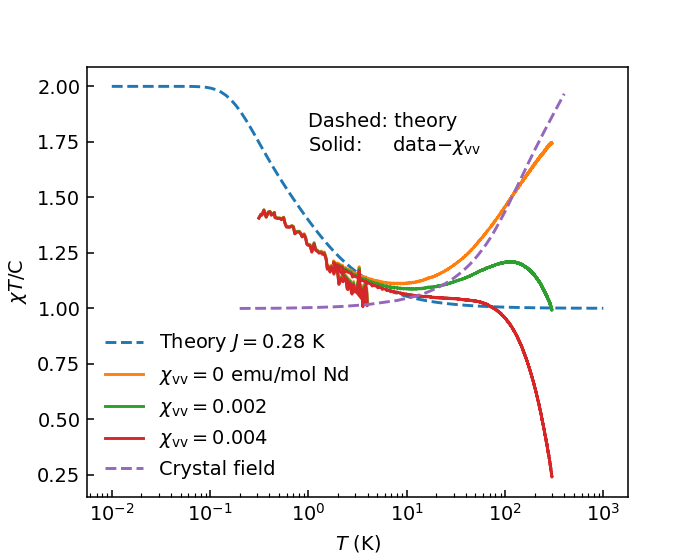

In [265]:
# together with the reported data from Lhotel above 0.3K （demag corrected）
plt.figure(figsize=[5,4])

J = 0.28 # in K 
plt.semilogx(Ts,chiTC(Ts,J),'--', label = 'Theory $J={}$ K'.format(J))
#J = 0.5 # in K 
#plt.semilogx(Ts,chiTC(Ts,J),'--', label = 'Theory $J={}$ K'.format(J))

#C1 = C / (4e-6*np.pi) # convert C to emu/mol/(J/K)

chi0= 0
plt.semilogx(dat2[:,0],(dat2[:,1]-chi0)*dat2[:,0]/C1,label='$\chi_\mathrm{vv}=$'+'{}'.format(chi0)+' emu/mol Nd')

chi0= 2e-3
plt.semilogx(dat2[:,0],(dat2[:,1]-chi0)*dat2[:,0]/C1,label='$\chi_\mathrm{vv}=$'+'{}'.format(chi0))
chi0= 4e-3
plt.semilogx(dat2[:,0],(dat2[:,1]-chi0)*dat2[:,0]/C1,label='$\chi_\mathrm{vv}=$'+'{}'.format(chi0))
plt.semilogx(datCEF[:,0],datCEF[:,1]*datCEF[:,0]/C2,'--',label='Crystal field')
ax = plt.gca()
plt.text(1,1.7,'Dashed: theory\nSolid:     data$-\chi_\mathrm{vv}$', transform=ax.transData)
plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$\chi T \mathrm{/C}$')

plt.legend(loc='best',frameon=False)
#plt.savefig(r'D:\7_Writing\2_Rreport\nzo_chiTC_orderM\nzo_chiC_Demag_prl.png',bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


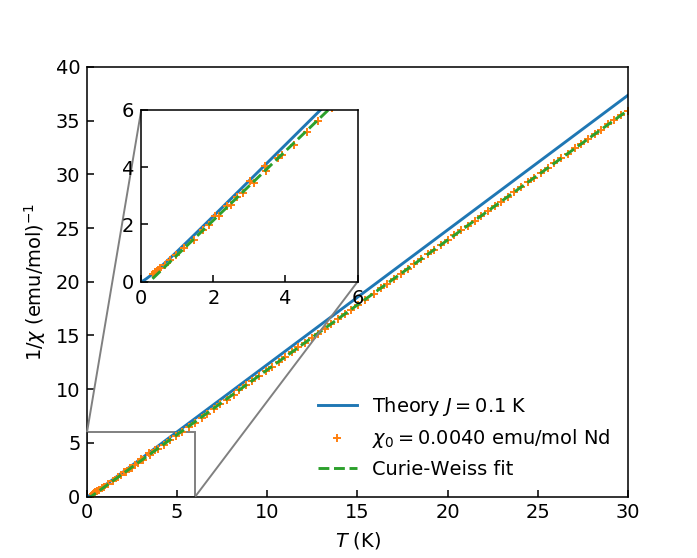

[ 0.82805502  0.22490046  0.00396018] [  64.86450174  944.4330103     1.32984777]


In [267]:
# Plot 1/chi: data and theory
plt.figure(figsize=[5,4])

# Plot theory 
C1 = C / (4e-6*np.pi) # convert C to emu/mol/(J/K)
J = 0.1 # in K 
plt.plot(Ts,1./chi_theory(Ts,J,C1),'-', label = 'Theory $J={}$ K'.format(J))

# Fit Curie-Weiss law and plot
def chiCW(t,C,Tcw,chi0):
    return C/(t-Tcw)+chi0
lb, hb = 20, 30
temp = getReg(dat0, lb, hb)
x, y = temp[:,0], temp[:,1]
params0, bounds = [0.8,0.2,0.005], [[0,-0.5,0],[np.inf,0.8,0.01]]
popt, pcov = curve_fit(chiCW, x, y, p0=params0, bounds=bounds, sigma=np.sqrt(y), absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
print popt, perr

# Plot data and fit
chi0= popt[2]# 4e-3
#plt.plot(dat2[:,0],1./(dat2[:,1]-chi0),marker='o',mew=0.2,ms=2,mfc='none',label='$\chi_0=$'+'{}'.format(chi0)+' emu/mol Nd')
plt.plot(dat2[:,0],1./(dat2[:,1]-chi0),marker='+', ls='none', ms=4, markevery=5,label='$\chi_0=$'+'{:0.4f}'.format(chi0)+' emu/mol Nd')
x = np.linspace(0,50,100)
plt.plot(x,1./(chiCW(x,popt[0],popt[1],popt[2])-popt[2]),'--',label='Curie-Weiss fit')


# Set axis properties
plt.xlim([0.01,30]); plt.ylim([0.0,40])
ax = plt.gca()
plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$1/\chi$ (emu/mol)$^{-1}$')
plt.legend(loc='lower right',frameon=False)

# Zoomed inset
rect = [0.1,0.5,0.4,0.4]
ins_ax = add_subplot_axes(ax,rect)
ins_ax.plot(Ts,1./chi_theory(Ts,J,C1),'-', label = 'Theory $J={}$ K'.format(J))
ins_ax.plot(dat2[:,0],1./(dat2[:,1]-chi0),marker='+', ls='none', ms=4, markevery=5,label='$\chi_0=$'+'{}'.format(chi0)+' emu/mol Nd')
ins_ax.plot(x,1./(chiCW(x,popt[0],popt[1],popt[2])-popt[2]),'--',label='Curie-Weiss fit')
ins_ax.axis([0,6,0,6])

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, ins_ax, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [ ]:
all the  experiments on classical and quantum spin ice
chiAC

## Fit the critical exponeit from the ordered moment

In [53]:
from io import BytesIO

dataStr = """
0.1	    1.26	0.01732
0.25	1.124	0.02511
0.3	    0.961	0.03464
0.34	0.79	0.0336
0.36	0.702	0.05387
0.37	0.57	0.03845
0.38	0.433	0.06928
0.39	0.3	    0.0866
0.4	   0.05	    0.1732
"""
        
Mt = np.genfromtxt(BytesIO(dataStr),delimiter='\t')
x, y, err = Mt[:,0], Mt[:,1], Mt[:,2]

# plt.figure(figsize=[3,2])
# plt.errorbar(x, y, err, marker = 'o',ls='none' )
# plt.show()

from scipy.optimize import curve_fit
def getReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]<= dat[:,0]) & (dat[:,0] <= args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]<= dat[:,0]) & (dat[:,0] <= args[1])
    return dat[mask,:]

def criExp(T,scale,Tc,beta):
    return scale * ((Tc-T)/Tc)**beta

[ 1.40674936  0.40000501  0.30665274] [  2.18769995e-02   6.42848745e-05   1.54917247e-02]


<IPython.core.display.Javascript object>


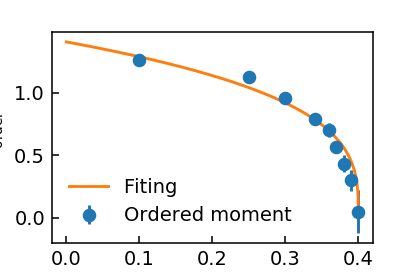

In [54]:
# Fit the critical exponent
params_0 = [1.2, 0.4, 0.33]
bounds = [[0,0.35,0.1], [5,0.45,0.5]]

popt, pcov = curve_fit(criExp, x, y, p0=params_0,
                       bounds=bounds, sigma=err, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print popt, perr

plt.figure(figsize=[5,4])

plt.errorbar(x,y,err, marker='o',ls = 'none', label = 'Ordered moment')
ts = np.linspace(0,0.4,1001,endpoint=True)
plt.plot(ts, criExp(ts,*popt),'-', label = 'Fiting')

ax = plt.gca()
plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$M_\mathrm{order}$')
plt.legend(loc='best',frameon=False)
plt.show()

[ 1.7013028   0.40004437  0.41585675] 
[ 0.07500807  0.00048251  0.0298903 ]


<IPython.core.display.Javascript object>


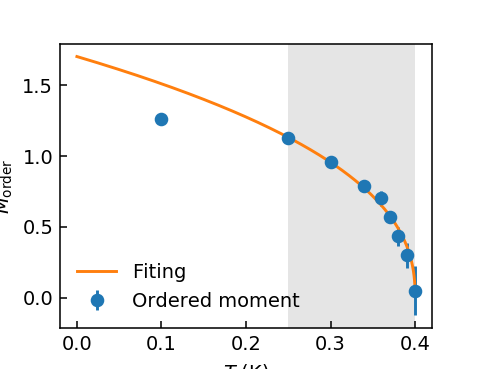

<function __main__.fitRegPlot>

In [55]:
# Fit the critical exponent: variable range
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

params_0 = [1.2, 0.4, 0.33]
bounds = [[0,0.35,0.1], [5,0.45,0.5]]

def fitRegPlot(lb=0,hb=0.4):
    global fig, axs, params_0, bounds
    axs.cla()  
    
    rMt = getReg(Mt, lb, hb)
    x, y, err = rMt[:,0], rMt[:,1], rMt[:,2]
    
    popt, pcov = curve_fit(criExp, x, y, p0=params_0,
                           bounds=bounds, sigma=err, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))

    print popt,'\n', perr

    axs.errorbar(Mt[:,0], Mt[:,1], Mt[:,2], marker='o',ls = 'none', label = 'Ordered moment')
    ts = np.linspace(0,0.4,1001,endpoint=True)
    plt.plot(ts, criExp(ts,*popt),'-', label = 'Fiting')
    
    axs.axvspan(x[0], x[-1], facecolor='grey', alpha=0.2)

    plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$M_\mathrm{order}$')
    plt.legend(loc='best',frameon=False)
    return fig
    
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(5,4))

interact(fitRegPlot, 
         lb=widgets.FloatSlider(min=0.25,max=0.35,step=0.001,value=0.25),
         hb=widgets.FloatSlider(min=0.35,max=0.41 ,step=0.001,  value=0.4))

[ 1.79752752  0.40006755  0.44155398] 
[ 0.16443112  0.00069161  0.04864762]


<IPython.core.display.Javascript object>


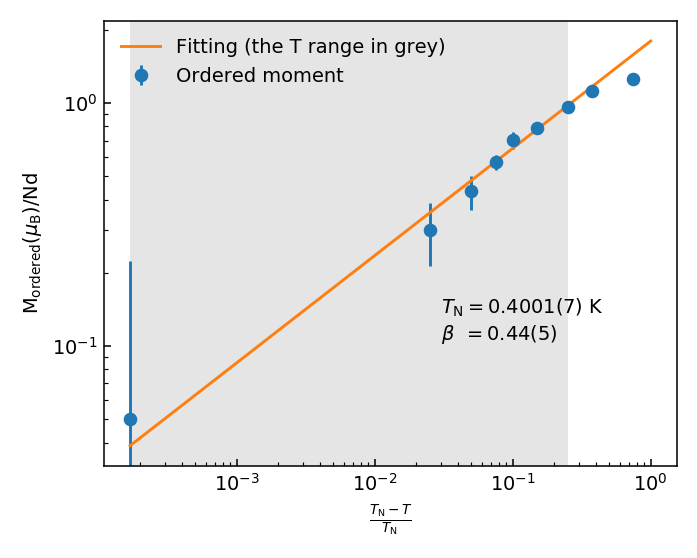

In [62]:
# Fit the critical exponent: variable range
params_0 = [1.2, 0.4, 0.1]
bounds = [[0,0.35,0.1], [5,0.45,0.8]]

def fitRegPlot(lb=0,hb=0.4):
    global fig, axs, params_0, bounds
    axs.cla()  
    
    rMt = getReg(Mt, lb, hb)
    x, y, err = rMt[:,0], rMt[:,1], rMt[:,2]
    
    popt, pcov = curve_fit(criExp, x, y, p0=params_0,
                           bounds=bounds, sigma=err, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))

    print popt,'\n', perr

    axs.errorbar((popt[1]-Mt[:,0])/popt[1], Mt[:,1], Mt[:,2], marker='o',ls = 'none', label = 'Ordered moment')
    
    ts = np.linspace(0,0.4,1001,endpoint=True)
    axs.plot((popt[1]-ts)/popt[1], criExp(ts,*popt),'-', label = 'Fitting (the T range in grey)')
    
    axs.axvspan((popt[1]-x[0])/popt[1], (popt[1]-x[-1])/popt[1], facecolor='grey', alpha=0.2)
    
    # Show pars in form of '1.2(1) K' (value(error))
    Nerr = np.abs(np.floor(np.log10(abs(perr)))).astype(int) # get position of the first non-zero digit of the error
    Rerr = [np.round(perr[i],decimals=Nerr[i]) for i in range(len(popt))] # round the error to have only one effective nb
    Serr = np.array(Rerr).astype(str) # convert error to string
    Serr = [np.int(Serr[i][-1]) for i in range(len(popt))] # get the last digit of the error
   
    axs.text(0.03,0.1,r'$T_\mathrm{N}=$'+'{:{width}.{prec}f}'.format(popt[1],width=0,prec=Nerr[1]) # width and prec must be int type!!!
             + '({:d}) K'.format(Serr[1])
             +'\n'+
             r'$\beta\,\,\,=$'+'{:{width}.{prec}f}'.format(popt[2],width=0,prec=Nerr[2])
             + '({:d})'.format(Serr[2]), 
             transform=axs.transData,ha='left',va='bottom')
#     axs.text(0.6,0.5,
#              r'\begin{eqnarray*}' + \
#              r'T_\mathrm{N}&= 2' + r'\\\\' + \
#              r'\beta & = 2'+  \
#              r'\end{eqnarray*}', transform=ax.transAxes) # Align equations: must set rc('text', usetex=False) but still need LaTex path setted
    
    axs.set_xscale("log")
    axs.set_yscale("log")
    
    plt.xlabel(r'$\frac{T_\mathrm{N}-T}{T_\mathrm{N}}$'); plt.ylabel(r'$\mathrm{M_{ordered}}(\mu_\mathrm{B})$/Nd')
    plt.legend(loc='best',frameon=False)
    fig.tight_layout()
    #fig.savefig(r'D:\5_Neutron Scattering\2_DMC_PSI_Sep2014__NdGdZrO\critical_Mt_fit.png',bbox_inches='tight')
    return fig
    
fig, axs = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(5,4))

interact(fitRegPlot, 
         lb=widgets.FloatSlider(min=0.05,max=0.35,step=0.001,value=0.3, continuous_update=False),
         hb=widgets.FloatSlider(min=0.35,max=0.4 ,step=0.001,value=0.4, continuous_update=False))

6
[[ 1.40674936  0.40000501  0.30665274]
 [ 1.70130377  0.40004442  0.4158573 ]
 [ 1.7975268   0.40006753  0.44155371]
 [ 2.07377078  0.4001546   0.50183124]
 [ 3.38879336  0.40128174  0.69593737]
 [ 2.91952684  0.40074559  0.63717104]]
[[  2.18769994e-02   6.42848734e-05   1.54917248e-02]
 [  7.50085203e-02   4.82790628e-04   2.98907169e-02]
 [  1.64430702e-01   6.91528211e-04   4.86473940e-02]
 [  3.93643604e-01   1.37363378e-03   8.79582530e-02]
 [  2.12776510e+00   6.44814143e-03   2.88500482e-01]
 [  2.37952698e+00   4.73622364e-03   3.30002846e-01]]
[ 0.00899082  0.00215349  0.00203374  0.00140237  0.00027413  0.00018364]


<IPython.core.display.Javascript object>


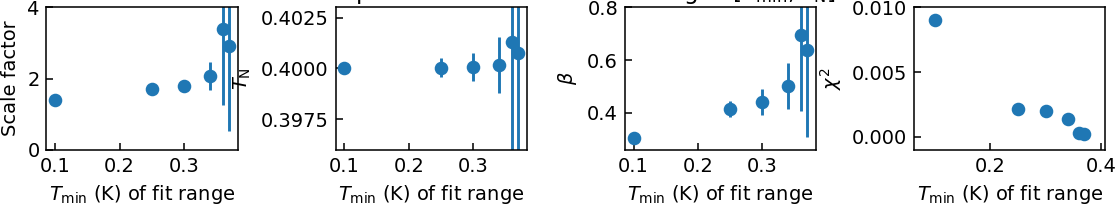

In [90]:
# Fitted parameters in different range
x, y, err = Mt[:,0], Mt[:,1], Mt[:,2]

# least nb of pts to fit
min_nb = 3
tot_nb = len(Mt)

tot_runs = tot_nb - min_nb

params_0 = [1.2, 0.4, 0.33]
bounds = [[0,0.35,0.1], 
          [5,0.45,0.8]]
popts, perrs, chi2s = np.zeros([tot_runs,3]), np.zeros([tot_runs,3]), np.zeros([tot_runs])

for i in range(tot_runs):
    popt, pcov = curve_fit(criExp, x[i:], y[i:], p0=params_0,
                           bounds=bounds, sigma=err[i:], absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))

    popts[i,:] = popt
    perrs[i,:] = perr
    chi2s[i] = sum((criExp(x[i:],*popt)-y[i:])**2)/(tot_nb-i-3) # (fitted nb of data pts) - (nb of parameters)   
    
print tot_runs
print popts
print perrs
print chi2s

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(8,1.5))
axs = axs.flatten()

axs[0].errorbar(Mt[:tot_runs,0], popts[:,0], perrs[:,0], marker='o',ls = 'none', label = 'Ordered moment')
axs[1].errorbar(Mt[:tot_runs,0], popts[:,1], perrs[:,1], marker='o',ls = 'none', label = 'Ordered moment')
axs[2].errorbar(Mt[:tot_runs,0], popts[:,2], perrs[:,2], marker='o',ls = 'none', label = 'Ordered moment')
axs[3].scatter(Mt[:tot_runs,0], chi2s, marker='o', label = r'$\chi^2$')

axs[0].set_ylim([0,4])
axs[1].set_ylim([0.396,0.403])
axs[2].set_ylim([0.26,0.8])
axs[3].set_ylim([-0.001,0.01])

[axs[i].set_xlabel(r'$T_\mathrm{min}$ (K) of fit range') for i in [0,1,2,3]]
axs[0].set_ylabel('Scale factor')
axs[1].set_ylabel(r'$T_\mathrm{N}$')
axs[2].set_ylabel(r'$\beta$')
axs[3].set_ylabel( r'$\chi^2$')

plt.suptitle('Fitted params with different fit ranges $[T_\mathrm{min},T_\mathrm{N}]$',x=0.5,y=1.1)

plt.tight_layout(pad=0., w_pad=-0.1)
fig.savefig(r'D:\5_Neutron Scattering\2_DMC_PSI_Sep2014__NdGdZrO\critical_Mt_fit_pars.png',bbox_inches='tight')
plt.show()